# 파이썬으로 시작하는 데이터 분석 첫걸음 🚀

이 노트북은 **Iris(붓꽃) 데이터셋**을 사용하여 데이터 분석의 가장 기초적인 3단계(**불러오기, 살펴보기, 시각화하기**)를 실습합니다. 

각 코드 셀은 **한 줄 한 줄 상세한 주석**과 함께 설명되어 있어, 파이썬이나 데이터 분석이 처음인 분들도 쉽게 따라 하실 수 있도록 구성되었습니다.

## 준비: Google Colab에 파일 업로드하기

이 코드를 실행하기 전에, 먼저 `iris.dat` 파일을 Colab 환경에 업로드해야 합니다.

1.  화면 왼쪽의 **폴더 모양 아이콘**을 클릭하여 파일 탐색기를 엽니다.
2.  **'세션 저장소에 업로드' 아이콘**(파일 위 화살표 모양)을 클릭하거나, 컴퓨터에 있는 `iris.dat` 파일을 탐색기 창으로 드래그 앤 드롭합니다.
3.  `iris.dat` 파일이 목록에 나타나면 준비 완료입니다.

## 1단계: 라이브러리 불러오기 (Import Libraries)

데이터 분석을 시작하기 전에, 필요한 도구들이 들어있는 '도구 상자(라이브러리)'를 파이썬으로 가져와야 합니다. `import` 키워드는 특정 라이브러리를 이 노트북에서 사용하겠다고 선언하는 역할을 합니다.

In [1]:
# 'pandas'는 파이썬에서 데이터를 표(엑셀 시트와 유사한 형태)로 다루기 위한 가장 핵심적인 라이브러리입니다.
# 데이터를 불러오고, 정제하고, 기본적인 분석을 할 때 반드시 필요합니다.
# 'as pd'는 앞으로 이 노트북에서 pandas를 pd라는 짧은 이름으로 부르겠다는 약속(별명)입니다.
import pandas as pd

# 'matplotlib'는 파이썬의 대표적인 데이터 시각화 라이브러리로, 그래프를 그리는 기본 틀을 제공합니다.
# 그중에서도 pyplot 모듈은 그래프를 그리고 꾸미는 대부분의 기능을 포함하고 있습니다.
# 'as plt'는 pyplot을 plt라는 짧은 이름으로 부르겠다는 약속입니다.
import matplotlib.pyplot as plt

# 'seaborn'은 matplotlib을 기반으로 만들어진 라이브러리로, 더 다채롭고 통계적으로 아름다운 그래프를 쉽게 그릴 수 있게 도와줍니다.
# 'as sns'는 seaborn을 sns라는 짧은 이름으로 부르겠다는 약속입니다.
import seaborn as sns

## 2단계: 데이터 불러오기 (Load Data)

준비 단계에서 업로드한 `iris.dat` 파일을 pandas를 이용해 표 형태의 데이터 구조인 **데이터프레임(DataFrame)**으로 불러옵니다. 데이터프레임은 데이터 분석 작업의 중심이 되는 가장 중요한 객체입니다.

In [2]:
# 분석할 파일의 이름인 'iris.dat'를 file_path라는 변수에 문자열로 저장합니다.
# 이렇게 하면 나중에 파일 이름이 바뀌더라도 이 부분만 수정하면 되므로 편리합니다.
file_path = 'iris.dat'

# 원본 데이터 파일에는 각 열이 무엇을 의미하는지 이름이 적혀있지 않습니다.
# 따라서 우리가 직접 각 열에 해당하는 이름을 리스트(list) 형태로 만들어줍니다.
# 순서대로 꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비, 품종을 의미합니다.
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# pandas의 read_csv 함수를 사용해 텍스트 파일을 데이터프레임으로 읽어옵니다.
# df라는 변수에 결과를 저장하는데, df는 DataFrame의 약자로 관례적으로 많이 사용됩니다.
df = pd.read_csv(
    file_path,               # 첫 번째 인자: 읽어올 파일의 경로
    sep='\s+',              # sep: 데이터를 구분하는 기준(구분자)을 지정합니다. '\s+'는 공백(space)이 한 개 이상이라는 뜻으로, 데이터가 불규칙한 공백으로 나뉘어 있어도 잘 읽어옵니다.
    header=None,             # header: 파일의 첫 번째 줄이 열 이름(header)인지 여부를 지정합니다. None은 열 이름이 없다는 뜻입니다.
    names=column_names       # names: 열 이름이 없을 경우, 이 파라미터를 통해 우리가 직접 만든 column_names 리스트를 열 이름으로 사용하도록 지정합니다.
)

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
C:\Users\jacob\AppData\Local\Temp\ipykernel_29824\148163003.py:14: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',              # sep: 데이터를 구분하는 기준(구분자)을 지정합니다. '\s+'는 공백(space)이 한 개 이상이라는 뜻으로, 데이터가 불규칙한 공백으로 나뉘어 있어도 잘 읽어옵니다.


## 3단계: 데이터 살펴보기 (Exploratory Data Analysis, EDA)

데이터를 불러온 후에는 가장 먼저 데이터가 제대로 들어왔는지, 어떤 구조와 특징을 가지고 있는지 탐색해야 합니다. 이 과정을 **탐색적 데이터 분석(EDA)**이라고 부릅니다.

### 3-1. 데이터 샘플 확인하기

`.head()`는 데이터프레임의 맨 앞부분(기본 5줄)을 보여주는 함수입니다. 데이터가 어떤 식으로 구성되어 있는지 빠르게 훑어볼 때 사용합니다.

In [3]:
# df 변수에 저장된 데이터프레임의 내용 중, 위에서부터 5개의 행을 출력합니다.
# 코딩에서는 '함수' 대신 '메서드(method)'라는 용어를 자주 사용합니다. df라는 객체에 속한 기능이라는 의미입니다.
print("--- 데이터 샘플 (상위 5개) ---")
df.head()

--- 데이터 샘플 (상위 5개) ---


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### 3-2. 데이터 요약 정보 확인하기

`.info()`는 데이터프레임의 전체적인 정보를 요약해서 보여줍니다. 데이터 분석 과정에서 매우 유용하게 사용되는 기능입니다.

In [4]:
# 데이터프레임의 전체적인 정보를 출력합니다.
print("--- 데이터 요약 정보 ---")
df.info()

--- 데이터 요약 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


#### `.info()` 결과 해석:
* **RangeIndex: 150 entries, 0 to 149**: 데이터가 총 150줄(행)이며, 인덱스는 0부터 149까지라는 의미입니다.
* **Data columns (total 5 columns)**: 총 5개의 열이 있다는 의미입니다.
* **Column 이름**: 각 열의 이름입니다.
* **Non-Null Count**: 각 열마다 비어있지 않은(Null이 아닌) 데이터의 개수입니다. 150개 행인데 모든 열이 150 Non-Null이라면, 이 데이터셋에는 **비어있는 값(결측치)이 하나도 없다**는 것을 의미합니다. 매우 깨끗한 데이터네요!
* **Dtype**: 각 열의 데이터 타입입니다. `float64`는 소수점이 있는 숫자, `int64`는 정수를 의미합니다.

### 3-3. 기초 통계량 확인하기

`.describe()`는 숫자형 데이터 열에 대한 핵심 통계량을 요약해서 보여줍니다. 데이터의 분포와 스케일을 파악하는 데 가장 기본적이고 중요한 단계입니다.

In [5]:
# 숫자형 데이터 타입(float64, int64)을 가진 모든 열에 대해 기초 통계량을 계산하고 표 형태로 출력합니다.
print("--- 기초 통계량 ---")
df.describe()

--- 기초 통계량 ---


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


#### `.describe()` 결과 해석:
* **count**: 데이터 개수
* **mean**: 평균값
* **std**: 표준편차 (값이 얼마나 퍼져있는지)
* **min**: 최소값
* **25%**: 하위 25% 지점의 값 (제1사분위수)
* **50%**: 중앙값 (제2사분위수)
* **75%**: 하위 75% 지점의 값 (제3사분위수)
* **max**: 최대값

👉 예를 들어 `sepal_length` 열을 보면, 평균 길이는 약 5.84cm이고, 가장 작은 값은 4.3cm, 가장 큰 값은 7.9cm라는 것을 알 수 있습니다.

## 4단계: 데이터 시각화하기 (Data Visualization)

데이터의 패턴이나 변수 간의 관계는 숫자로만 보기보다 그래프로 그렸을 때 훨씬 명확하게 드러납니다. `seaborn` 라이브러리를 사용해 몇 가지 기본적인 그래프를 그려보겠습니다.

### 4-1. 히스토그램으로 분포 확인하기

**히스토그램(Histogram)**은 특정 데이터가 어떤 값의 구간에 얼마나 많이 분포하는지를 막대그래프 형태로 보여줍니다. 데이터의 전반적인 분포 형태(예: 종 모양, 한쪽으로 치우친 모양 등)를 파악할 수 있습니다.

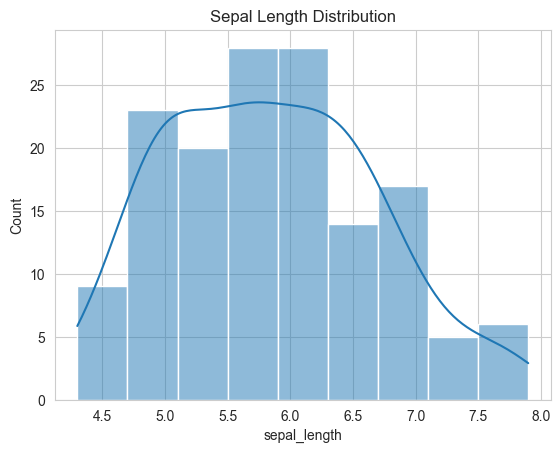

In [6]:
# seaborn의 set_style 함수로 그래프의 배경 스타일을 설정합니다. 'whitegrid'는 흰 배경에 회색 격자무늬를 추가해 줍니다.
sns.set_style('whitegrid')

# seaborn의 histplot 함수를 사용해 히스토그램을 그립니다.
# data=df: df 데이터프레임을 사용합니다.
# x='sepal_length': x축의 데이터로 'sepal_length' 열을 사용합니다.
# kde=True: Kernel Density Estimate의 약자로, 히스토그램 위에 분포를 나타내는 부드러운 곡선을 함께 그려주는 옵션입니다.
sns.histplot(data=df, x='sepal_length', kde=True)

# matplotlib의 title 함수를 사용해 그래프의 제목을 추가합니다.
plt.title('Sepal Length Distribution')

# matplotlib의 show 함수는 지금까지 설정한 그래프를 화면에 최종적으로 출력하라는 명령어입니다.
plt.show()

### 4-2. 산점도로 변수 간 관계 확인하기

**산점도(Scatter Plot)**는 두 변수 사이의 관계를 점으로 표현한 그래프입니다. 변수들이 서로 어떤 관계(예: 하나가 커질 때 다른 하나도 커지는지)를 갖는지 확인할 수 있습니다. 여기에 `hue` 옵션을 추가하면, 품종별로 점의 색을 다르게 하여 더 깊은 통찰을 얻을 수 있습니다.

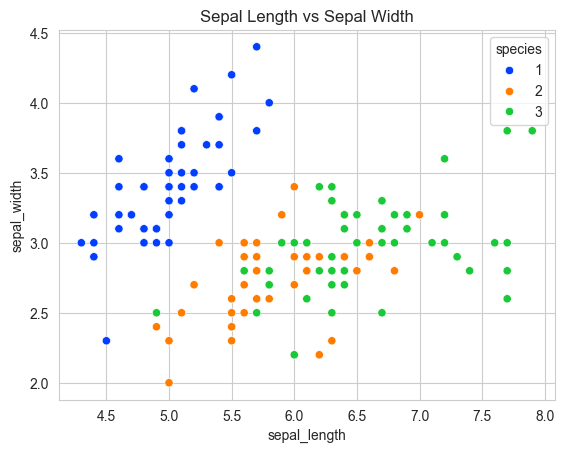

In [7]:
# seaborn의 scatterplot 함수를 사용해 산점도를 그립니다.
# data=df: df 데이터프레임을 사용합니다.
# x='sepal_length': x축 데이터로 'sepal_length' 열을 사용합니다.
# y='sepal_width': y축 데이터로 'sepal_width' 열을 사용합니다.
# hue='species': 'species'(품종) 열의 값에 따라 점의 색깔을 다르게 칠하라는 의미입니다. (1, 2, 3)
# palette='bright': 점의 색깔 테마를 'bright'로 설정합니다. 'viridis', 'deep', 'muted' 등 다양한 테마를 사용할 수 있습니다.
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', palette='bright')

# 그래프의 제목을 추가합니다.
plt.title('Sepal Length vs Sepal Width')

# 그래프를 화면에 출력합니다.
plt.show()

### 4-3. 페어플롯으로 전체 관계 한눈에 보기

**페어플롯(Pair Plot)**은 데이터프레임에 있는 모든 숫자형 변수 쌍에 대해 산점도를, 그리고 각 변수 자체에 대해서는 히스토그램을 한 번에 그려주는 매우 강력하고 편리한 시각화 도구입니다. 데이터 전체의 관계를 조망할 때 매우 유용합니다.

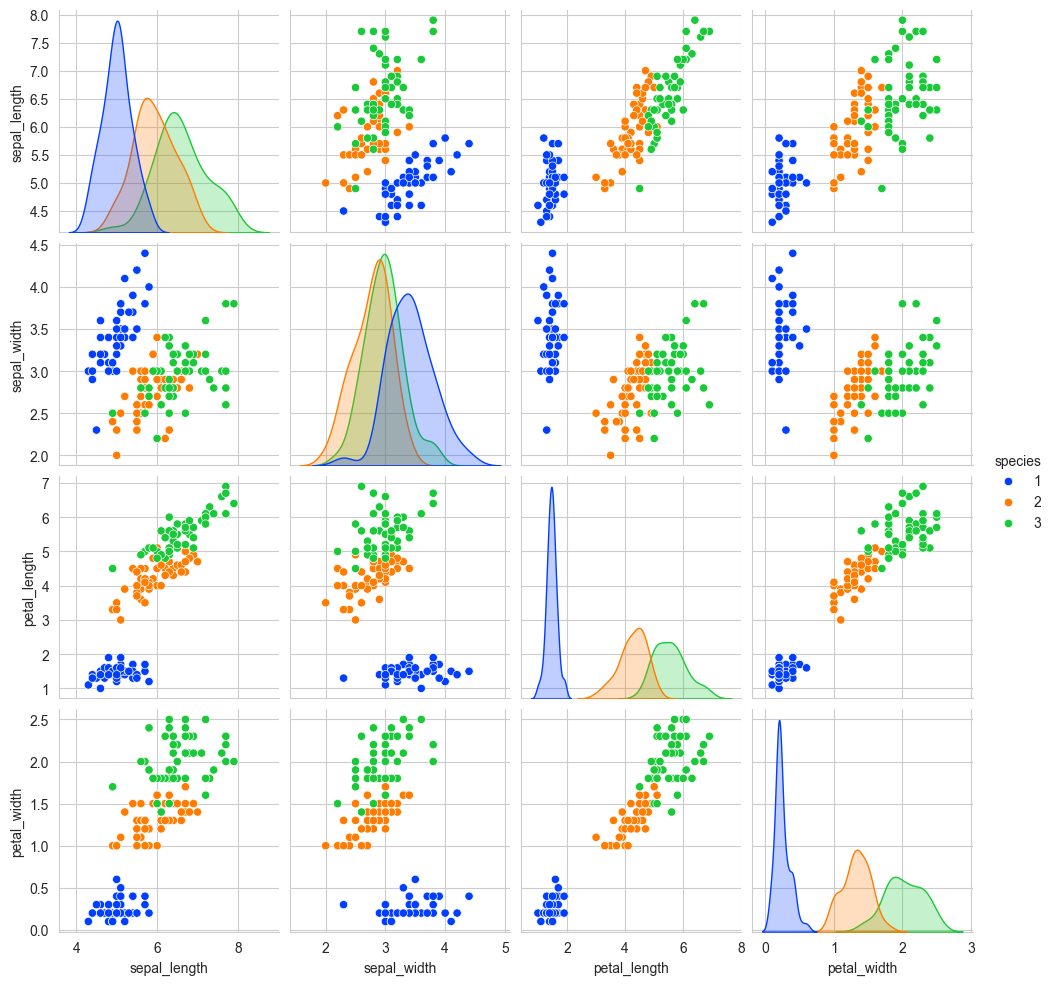

In [8]:
# seaborn의 pairplot 함수를 사용합니다.
# df: 전체 데이터프레임을 통째로 넣어줍니다.
# hue='species': 모든 산점도에서 품종별로 색을 구분하여 그려달라는 의미입니다.
# palette='bright': 색상 테마를 지정합니다.
sns.pairplot(df, hue='species', palette='bright')

# 그래프를 화면에 출력합니다.
# 이 그래프는 모든 변수 쌍을 그려야 하므로 시간이 조금 더 걸릴 수 있습니다.
plt.show()

#### 페어플롯 결과 해석:
👉 이 그래프 하나만으로도 많은 것을 알 수 있습니다. 예를 들어 `petal_length`와 `petal_width`는 매우 강한 양의 상관관계를 보이며, 품종별로 뚜렷하게 군집을 이루고 있는 것을 볼 수 있습니다. 이는 이 두 변수가 품종을 분류하는 데 매우 중요한 역할을 할 것이라는 강력한 힌트가 됩니다.

## 정리 및 다음 단계

**축하합니다!** 이 노트북을 통해 파이썬으로 데이터를 다루는 가장 기본적인 과정을 모두 마쳤습니다. 

이제 여러분은:
1.  **Pandas**로 텍스트 데이터를 불러와 **데이터프레임**으로 만들 수 있습니다.
2.  `.head()`, `.info()`, `.describe()`를 사용해 데이터의 **기본 구조와 통계적 특징**을 파악할 수 있습니다.
3.  **Seaborn**을 사용해 데이터의 **분포와 변수 간의 관계를 시각화**할 수 있습니다.

이 노트북의 코드를 수정하여 다른 변수(예: `petal_length`)로도 그래프를 그려보거나, 다른 데이터셋(`wine.dat`, `glass.dat` 등)에 같은 분석을 적용해 보면서 연습해 보세요! 이 경험은 앞으로의 연구에 훌륭한 밑거름이 될 것입니다.